In [1]:
import fsspec
import xradar
import xarray as xr
from datatree import open_datatree
import s3fs
import pyart


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead


In [11]:
path = '/media/alfonso/drive/Alfonso/zarr_radar'

## Open whole Datatree

In [12]:
%%time
ds_dt = open_datatree(f"{path}/test.zarr", engine="zarr")

CPU times: user 105 ms, sys: 26.1 ms, total: 131 ms
Wall time: 153 ms


## open single sweep

In [4]:
%%time
ds = xr.open_zarr(f"{path}/sweep_0")

CPU times: user 87.2 ms, sys: 2.39 ms, total: 89.6 ms
Wall time: 99 ms


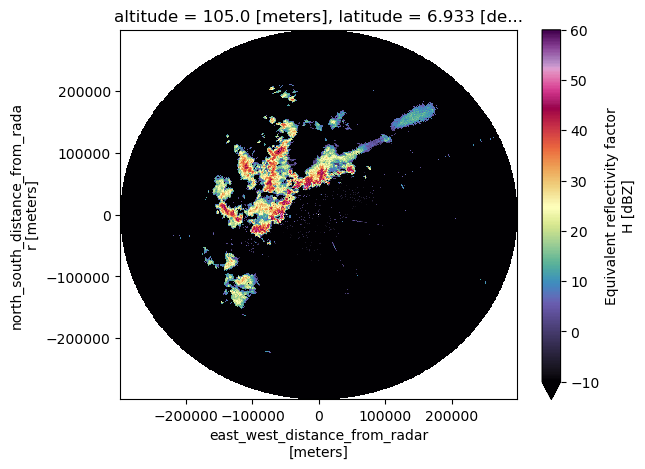

In [22]:
ds.sel(times='2023-04-07 03:35', method='nearest').DBZH.plot(x='x', 
                           y='y', 
                           cmap='pyart_ChaseSpectral', 
                           vmin=-10, 
                           vmax=60)

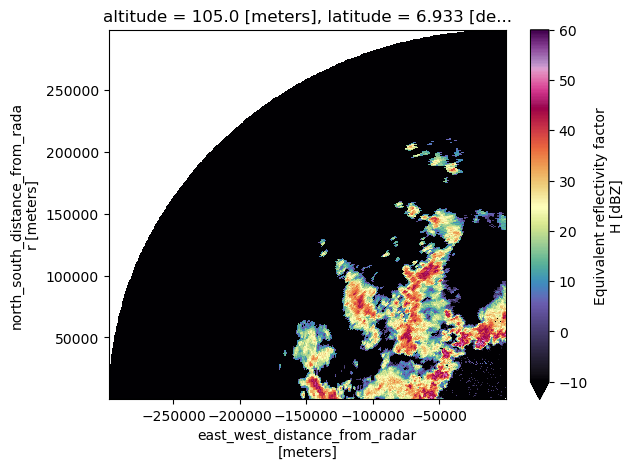

In [23]:
ds.sel(times='2023-04-07 03:35', method='nearest').sel(azimuth=slice(270, 360)).DBZH.plot(x='x', 
                           y='y', 
                           cmap='pyart_ChaseSpectral', 
                           vmin=-10, 
                           vmax=60)

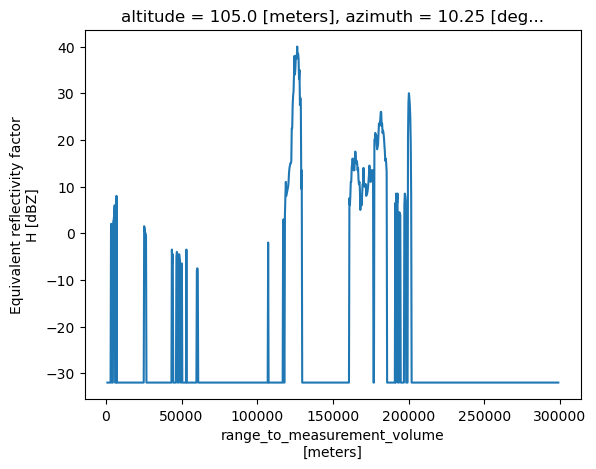

In [7]:
ds.isel(times=0).sel(azimuth=10, method='nearest').DBZH.plot()

In [39]:
%%time
dt_new = open_datatree(f"{path}/new_test_1.zarr", engine="zarr")

CPU times: user 11.8 ms, sys: 1.01 ms, total: 12.8 ms
Wall time: 14.4 ms


In [40]:
dt_new.times

<xarray.DataArray 'times' (times: 3)>
array(['2023-04-07T00:00:25.776000000', '2023-04-07T00:00:25.776000000',
       '2023-04-07T00:00:25.776000000'], dtype='datetime64[ns]')
Coordinates:
    altitude     float64 ...
    latitude     float64 ...
    longitude    float64 ...
    spatial_ref  int64 ...
  * times        (times) datetime64[ns] 2023-04-07T00:00:25.776000 ... 2023-0...

In [19]:
dt_new['sweep_0'].DBZH.chunk()

<xarray.DataArray 'DBZH' (times: 6, azimuth: 720, range: 994)>
dask.array<xarray-<this-array>, shape=(6, 720, 994), dtype=float32, chunksize=(6, 720, 994), chunktype=numpy.ndarray>
Coordinates:
    altitude     float64 ...
  * azimuth      (azimuth) float64 0.25 0.75 1.25 1.75 ... 358.8 359.2 359.8
    latitude     float64 ...
    longitude    float64 ...
  * range        (range) float32 1e+03 1.3e+03 1.6e+03 ... 2.986e+05 2.989e+05
    spatial_ref  int64 ...
  * times        (times) datetime64[ns] 2023-04-07T00:00:25.776000 ... 2023-0...
    x            (times, azimuth, range) float64 dask.array<chunksize=(6, 720, 994), meta=np.ndarray>
    y            (times, azimuth, range) float64 dask.array<chunksize=(6, 720, 994), meta=np.ndarray>
    z            (times, azimuth, range) float64 dask.array<chunksize=(6, 720, 994), meta=np.ndarray>
Attributes:
    coordinates:    elevation azimuth range latitude longitude altitude time ...
    long_name:      Equivalent reflectivity factor H
    standard_name:  radar_equivalent_reflectivity_factor_h
    units:          dBZ